<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:**


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import random

random.seed(0)

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

from sklearn.metrics import fbeta_score

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
df_gender = pd.read_csv('data/gender.csv', sep=',')
df_transactions = pd.read_csv('data/transactions.csv', sep=';')

In [3]:
df_gender.head()

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0


In [4]:
df_transactions.head()

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [5]:
df_transactions_users = df_transactions.groupby("user_id")["value"]

tmp_mean = df_transactions_users.mean()
tmp_mean.name = "value_mean"
tmp_sum = df_transactions_users.sum()
tmp_sum.name = "value_sum"
tmp_std = df_transactions_users.std()
tmp_std.name = "value_std"

df_agregate = df_gender.merge(tmp_mean, on="user_id").merge(tmp_sum, on="user_id").merge(tmp_std, on="user_id")
df_agregate.head()

,user_id,gender,value_mean,value_sum,value_std
0,6740969,1.0,2171.247582,996602.640,718.691164
1,36599781,0.0,2175.420475,2227630.566,645.511317
2,91453656,1.0,2363.186310,137064.806,684.686030
3,17431962,1.0,2118.185941,1112047.619,717.894125
4,72568668,1.0,1974.752011,533183.043,745.930038


### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [6]:
train_df, test_df = train_test_split(df_agregate, test_size=0.2, shuffle=True, random_state=42)
train_df = train_df.dropna()
test_df = test_df.dropna()

Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
X_train = train_df.drop(["gender", "user_id"], axis=1)
y_train = train_df["gender"]

X_test = test_df.drop(["gender", "user_id"], axis=1)
y_test = test_df["gender"]

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [8]:
model = LogisticRegression()

model.fit(X_train, y_train)

p_train_pred = model.predict_proba(X_train)[:,1]
p_test_pred = model.predict_proba(X_test)[:,1]

y_train_pred = 1*(p_train_pred >= 0.5) 
y_test_pred = 1*(p_test_pred >= 0.5) 

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [9]:
print("Train metrics:")
print("ROC_AUC: ", roc_auc_score(y_train, p_train_pred))
print("Accurancy: ", accuracy_score(y_train_pred, y_train))
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print()
print("Test metrics:")
print("ROC_AUC: ", roc_auc_score(y_test, p_test_pred))
print("Accurancy: ", accuracy_score(y_test_pred, y_test))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))

Train metrics:
ROC_AUC:  0.5587467780772143
Accurancy:  0.5619735258724429
Precision:  0.5895953757225434
Recall:  0.034658511722731905

Test metrics:
ROC_AUC:  0.5409932468320813
Accurancy:  0.547260686333534
Precision:  0.65
Recall:  0.034031413612565446


### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [10]:
df_agregate = df_gender.merge(pd.pivot_table(df_transactions, index="user_id", values='value', columns=['type'], aggfunc=np.sum, fill_value=0), on="user_id")

df_agregate.head()

,user_id,gender,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,6740969,1.0,0.0,0.0,0.0,5158.870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36599781,0.0,0.0,0.0,0.0,24895.983,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,91453656,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17431962,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72568668,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [11]:
train_df, test_df = train_test_split(df_agregate, test_size=0.2, shuffle=True, random_state=42)
train_df = train_df.dropna()
test_df = test_df.dropna()

In [12]:
X_train = train_df.drop(["gender", "user_id"], axis=1)
y_train = train_df["gender"]

X_test = test_df.drop(["gender", "user_id"], axis=1)
y_test = test_df["gender"]

In [13]:
model = LogisticRegression()

model.fit(X_train, y_train)

p_train_pred = model.predict_proba(X_train)[:,1]
p_test_pred = model.predict_proba(X_test)[:,1]

y_train_pred = 1*(p_train_pred >= 0.5) 
y_test_pred = 1*(p_test_pred >= 0.5) 

In [14]:
print("Train metrics:")
print("ROC_AUC: ", roc_auc_score(y_train, p_train_pred))
print("Accurancy: ", accuracy_score(y_train_pred, y_train))
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print()
print("Test metrics:")
print("ROC_AUC: ", roc_auc_score(y_test, p_test_pred))
print("Accurancy: ", accuracy_score(y_test_pred, y_test))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))

Train metrics:
ROC_AUC:  0.8061414921874058
Accurancy:  0.7320466786355476
Precision:  0.7168272794662713
Recall:  0.6531577169875042

Test metrics:
ROC_AUC:  0.7850583303451721
Accurancy:  0.7117224880382775
Precision:  0.7170953101361573
Recall:  0.6163849154746424


### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [15]:
df_agregate_changed = df_agregate.div(df_agregate.drop(["gender", "user_id"], axis=1).sum(axis=1), axis=0)
df_agregate[df_transactions.type.unique()] = df_agregate_changed[df_transactions.type.unique()]

df_agregate.head()

,user_id,gender,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
0,6740969,1.0,0.0,0.0,0.0,0.005176,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36599781,0.0,0.0,0.0,0.0,0.011176,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,91453656,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17431962,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,72568668,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_df, test_df = train_test_split(df_agregate, test_size=0.2, shuffle=True, random_state=42)
train_df = train_df.dropna()
test_df = test_df.dropna()

X_train = df_agregate.drop(["gender", "user_id"], axis=1)
y_train = df_agregate["gender"]

X_test = test_df.drop(["gender", "user_id"], axis=1)
y_test = test_df["gender"]

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели линейной регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у линейной регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

In [17]:
svc = LogisticRegression()
parameters = {'solver': ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

grid  = GridSearchCV(svc, parameters, cv=5, scoring="roc_auc")
grid.fit(X_train, y_train)

grid.best_params_["solver"]

'liblinear'

In [18]:
svc = LogisticRegression(solver="liblinear")
parameters = {'penalty': ['l1', 'l2'],
    "C": [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
}

grid  = GridSearchCV(svc, parameters, cv=5, scoring="roc_auc")
grid.fit(X_train, y_train)

print(grid.best_params_["penalty"], grid.best_params_["C"])

l2 1000.0


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [19]:
model = grid.best_estimator_

p_train_pred = model.predict_proba(X_train)[:,1]
p_test_pred = model.predict_proba(X_test)[:,1]

y_train_pred = 1*(p_train_pred >= 0.5) 
y_test_pred = 1*(p_test_pred >= 0.5) 

print("Train metrics:")
print("ROC_AUC: ", roc_auc_score(y_train, p_train_pred))
print("Accurancy: ", accuracy_score(y_train_pred, y_train))
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print()
print("Test metrics:")
print("ROC_AUC: ", roc_auc_score(y_test, p_test_pred))
print("Accurancy: ", accuracy_score(y_test_pred, y_test))
print("Precision: ", precision_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))

Train metrics:
ROC_AUC:  0.826312751449147
Accurancy:  0.7444949736716132
Precision:  0.7624218492925304
Recall:  0.6211796246648793

Test metrics:
ROC_AUC:  0.8224283453363804
Accurancy:  0.7356459330143541
Precision:  0.7738693467336684
Recall:  0.6007802340702211


Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__:

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

0.13


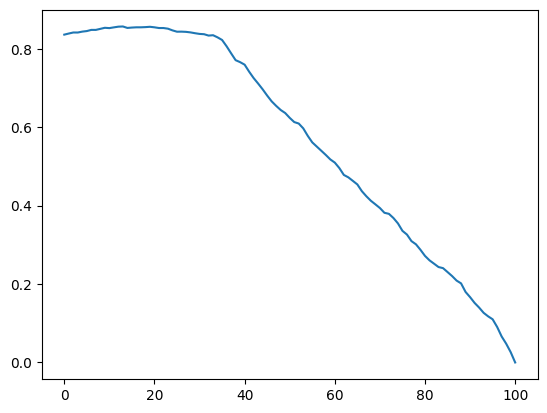

In [20]:
threds = []
accur = []

for thred in range(0, 101, 1):
    threds.append(thred)
    accur.append(fbeta_score(y_test, 1*(p_test_pred >= thred / 100), beta=5 ** 0.5))

best_threds = threds[accur.index(max(accur))]

plt.plot(threds, accur)
print(best_threds / 100)

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае линейной регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [21]:
coefs = model.coef_[0]
columns = df_agregate.columns.drop(["user_id", "gender"])

assert len(coefs) == len(columns)

df_coefs = pd.DataFrame({"type": columns, "coefs": coefs})

df_down_coefs = df_coefs[df_coefs.coefs < 0]
df_up_coefs = df_coefs[df_coefs.coefs > 0]

df_down_coefs.set_index("type").sort_values(by="coefs")

,coefs
type,
Готовая женская одежда,-114.456134
"Ткани, обивочный материал, гардины и портьеры, жалюзи",-104.842050
Аксессуары для женщин,-88.817948
Различные магазины одежды и аксессуаров,-68.033703
"Магазины ткани, ниток рукоделия, шитья",-62.343833
...,...
Пассажирские железные перевозки,-0.840610
"Оптика, оптические товары и очки",-0.793727
Общий ремонт,-0.456057


In [22]:
df_up_coefs.set_index("type").sort_values(by="coefs", ascending=False)

,coefs
type,
Автозапчасти и аксессуары,56.549279
Продажа электронного оборудования,46.977180
"Программирование, обработка данных, интегрированные системы, дизайн",41.205737
Магазины спорттоваров,40.092890
"Розничная продажа стекла, красок и обоев",36.848533
...,...
"Ремонт бытовой техники, ремонт электроприборы",0.582447
Промышленное оборудование — нигде более не классифицированное,0.390523
"Места общественного питания, рестораны",0.367211


# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

In [23]:
# Ваш код здесь